In [5]:
# Import the necessary modules and configure your device accordingly
from utils import get_som_labeled_img, check_ocr_box, get_caption_model_processor, get_yolo_model
import torch
from ultralytics import YOLO
from PIL import Image
import base64
import matplotlib.pyplot as plt
import io
import ollama

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

som_model = get_yolo_model(model_path=r'C:\Users\user\Desktop\fellowship\OmniParser\OmniParser\icon_detect\best.pt')
som_model.to(device)


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [6]:
caption_model_processor = get_caption_model_processor(model_name_or_path=r'C:\Users\user\Desktop\fellowship\OmniParser\OmniParser\icon_caption_blip2', device=device)   
# add the path to the icon_caption_blip2 folder based on your system

c:\Users\user\Desktop\fellowship\OmniParser\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 2/2 [01:15<00:00, 37.85s/it]


In [7]:
som_model.device, type(som_model) #, type(dino_model['model']), isinstance(som_model, YOLO) dino_model['model'].device, 

(device(type='cpu'), ultralytics.models.yolo.model.YOLO)

### This is the pipeline where i wil take the screenshot of the current web page and then pass it to an LLM model, the third stage of the pipleline, i.e. using LaVAgue to navigate is still a work in progress

##### This the home page of the chrome and i want to know where should i type in my search query

In [57]:
platform = 'pc'
cnt = 0
image_path = 'imgs\chrome.png'
if platform == 'pc':
    draw_bbox_config = {
        'text_scale': 0.8,
        'text_thickness': 2,
        'text_padding': 3,
        'thickness': 3,
    }
    BOX_TRESHOLD = 0.05
elif platform == 'web':
    draw_bbox_config = {
        'text_scale': 0.8,
        'text_thickness': 2,
        'text_padding': 3,
        'thickness': 3,
    }
    BOX_TRESHOLD = 0.05
elif platform == 'mobile':
    draw_bbox_config = {
        'text_scale': 0.8,
        'text_thickness': 2,
        'text_padding': 3,
        'thickness': 3,
    }
    BOX_TRESHOLD = 0.05
image = Image.open(image_path)
image_rgb = image.convert('RGB')

ocr_bbox_rslt, is_goal_filtered = check_ocr_box(image_path, display_img = False, output_bb_format='xyxy', goal_filtering=None, easyocr_args={'paragraph': False, 'text_threshold':0.9})
text, ocr_bbox = ocr_bbox_rslt

dino_labled_img, label_coordinates, parsed_content_list = get_som_labeled_img(image_path, som_model, BOX_TRESHOLD = BOX_TRESHOLD, output_coord_in_ratio=False, ocr_bbox=ocr_bbox,draw_bbox_config=draw_bbox_config, caption_model_processor=caption_model_processor, ocr_text=text,use_local_semantics=False)

<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
C:\Users\user\AppData\Local\Temp\ipykernel_22092\2513032572.py:3: SyntaxWarning: invalid escape sequence '\c'
  image_path = 'imgs\chrome.png'



image 1/1 c:\Users\user\Desktop\fellowship\OmniParser\imgs\chrome.png: 736x1280 300 icons, 260.4ms
Speed: 26.4ms preprocess, 260.4ms inference, 4.2ms postprocess per image at shape (1, 3, 736, 1280)


In [60]:
label_coordinates

{'0': array([         92,           8,          52,          24], dtype=float32),
 '1': array([        251,           7,         103,          25], dtype=float32),
 '2': array([        409,          11,         176,          20], dtype=float32),
 '3': array([       1238,           8,         104,          24], dtype=float32),
 '4': array([       1394,           8,          54,          24], dtype=float32),
 '5': array([        155,          55,          96,          20], dtype=float32),
 '6': array([        267,          59,          32,          16], dtype=float32),
 '7': array([        309,          57,          28,          14], dtype=float32),
 '8': array([       1845,          93,          64,          14], dtype=float32),
 '9': array([       1663,         145,          38,          16], dtype=float32),
 '10': array([       1711,         147,          48,          16], dtype=float32),
 '11': array([        813,         239,         297,         116], dtype=float32),
 '12': array([

In [59]:
parsed_content_list

['Text Box ID 0: A? 4 |',
 'Text Box ID 1: ;F| > F |',
 'Text Box ID 2: 36 ( | 8 ( | 3 | | 3',
 'Text Box ID 3: 28 [ | 0 [ |',
 'Text Box ID 4: 28 [ |',
 'Text Box ID 5: Search Google',
 'Text Box ID 6: type',
 'Text Box ID 7: URL',
 'Text Box ID 8: Bookmarks',
 'Text Box ID 9: Gmail',
 'Text Box ID 10: Images',
 'Text Box ID 11: Google',
 'Text Box ID 12: Search Google',
 'Text Box ID 13: type',
 'Text Box ID 14: URL',
 'Text Box ID 15: (1444) Youlu_',
 'Text Box ID 16: Trash',
 'Text Box ID 17: Insti _',
 'Text Box ID 18: Google Chro_',
 'Text Box ID 19: ChatGPT',
 'Text Box ID 20: Priyanshu Pil__.',
 "Text Box ID 21: 0'Reilly Media",
 'Text Box ID 22: PriyanshuPila__',
 'Text Box ID 23: PYIML/8_logi _',
 'Text Box ID 24: Add shortcut',
 'Text Box ID 25: Customize Chrome',
 'Text Box ID 26: 20.19',
 'Text Box ID 27: here to search',
 'Text Box ID 28: ENG',
 'Text Box ID 29: 27-10-2024',
 'Text Box ID 30: Heritage']

In [61]:
text1 = ", ".join(parsed_content_list)
text1

"Text Box ID 0: A? 4 |, Text Box ID 1: ;F| > F |, Text Box ID 2: 36 ( | 8 ( | 3 | | 3, Text Box ID 3: 28 [ | 0 [ |, Text Box ID 4: 28 [ |, Text Box ID 5: Search Google, Text Box ID 6: type, Text Box ID 7: URL, Text Box ID 8: Bookmarks, Text Box ID 9: Gmail, Text Box ID 10: Images, Text Box ID 11: Google, Text Box ID 12: Search Google, Text Box ID 13: type, Text Box ID 14: URL, Text Box ID 15: (1444) Youlu_, Text Box ID 16: Trash, Text Box ID 17: Insti _, Text Box ID 18: Google Chro_, Text Box ID 19: ChatGPT, Text Box ID 20: Priyanshu Pil__., Text Box ID 21: 0'Reilly Media, Text Box ID 22: PriyanshuPila__, Text Box ID 23: PYIML/8_logi _, Text Box ID 24: Add shortcut, Text Box ID 25: Customize Chrome, Text Box ID 26: 20.19, Text Box ID 27: here to search, Text Box ID 28: ENG, Text Box ID 29: 27-10-2024, Text Box ID 30: Heritage"

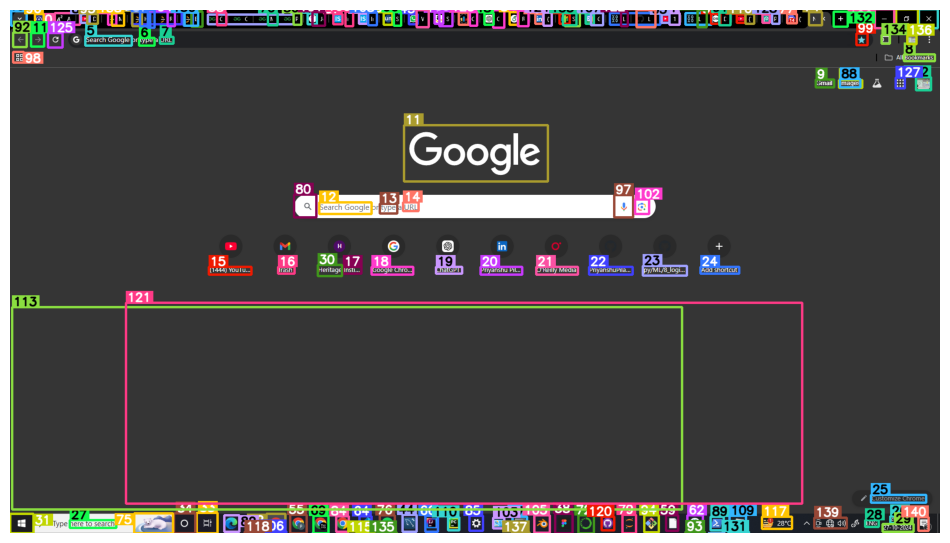

In [63]:
plt.figure(figsize=(12,12))

image = Image.open(io.BytesIO(base64.b64decode(dino_labled_img)))
plt.axis('off')

plt.imshow(image)

In [62]:
prompt = f'I want to perform a google search which text box do i choose in the following : {text1}?'
response = ollama.chat(model="llama3.2", messages=[{'role': 'user', 'content': prompt}])
print(response['message']['content'])

To perform a Google search, you need to choose the following text boxes:

1. Text Box ID 5: Search Google
2. Text Box ID 7: URL (to enter the search query)
3. Type in your search query in the URL field.

Then, click on the "Search Google" button, which is actually two separate options:
 
4. Text Box ID 12: Search Google


In [20]:
image.save("dino_labled_img.png", format="PNG")  #To save the annotated image run this cell

##### Lets say i type in 'sbi bank' my target is to identify where the link to the bank's website is

In [77]:
platform = 'pc'
cnt = 0
image_path = 'imgs\sbi_try1.png'
if platform == 'pc':
    draw_bbox_config = {
        'text_scale': 0.8,
        'text_thickness': 2,
        'text_padding': 3,
        'thickness': 3,
    }
    BOX_TRESHOLD = 0.05
elif platform == 'web':
    draw_bbox_config = {
        'text_scale': 0.8,
        'text_thickness': 2,
        'text_padding': 3,
        'thickness': 3,
    }
    BOX_TRESHOLD = 0.05
elif platform == 'mobile':
    draw_bbox_config = {
        'text_scale': 0.8,
        'text_thickness': 2,
        'text_padding': 3,
        'thickness': 3,
    }
    BOX_TRESHOLD = 0.05
image = Image.open(image_path)
image_rgb = image.convert('RGB')

ocr_bbox_rslt, is_goal_filtered = check_ocr_box(image_path, display_img = False, output_bb_format='xyxy', goal_filtering=None, easyocr_args={'paragraph': False, 'text_threshold':0.9})
text, ocr_bbox = ocr_bbox_rslt

dino_labled_img, label_coordinates, parsed_content_list = get_som_labeled_img(image_path, som_model, BOX_TRESHOLD = BOX_TRESHOLD, output_coord_in_ratio=False, ocr_bbox=ocr_bbox,draw_bbox_config=draw_bbox_config, caption_model_processor=caption_model_processor, ocr_text=text,use_local_semantics=False)

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\user\AppData\Local\Temp\ipykernel_22092\1391461586.py:3: SyntaxWarning: invalid escape sequence '\s'
  image_path = 'imgs\sbi_try1.png'



image 1/1 c:\Users\user\Desktop\fellowship\OmniParser\imgs\sbi_try1.png: 704x1280 300 icons, 284.8ms
Speed: 25.5ms preprocess, 284.8ms inference, 21.3ms postprocess per image at shape (1, 3, 704, 1280)


In [78]:
text2 = ", ".join(parsed_content_list)
text2

'Text Box ID 0: 0 /0, Text Box ID 1: X, Text Box ID 2: 0 | 0, Text Box ID 3: M | O fe, Text Box ID 4: Fi|, Text Box ID 5: N | 0 U | Oo I0, Text Box ID 6: google com /search?q-sbi+bank&rlz- 1CIONGR_enIN1O89IN1089&0q-sbi+bank&gs_Icrp-EgZjaHJvbWUyBggAEEUYOTIVCAEQLhhDGMcBGLEDGNEDGIAEGloFMg8IAhAAGEMYsQMYgAQYigUyCggDEAAYsQMYgAQyEAgEEC4YxwEYsQMYOQMYgAQyFQgFE, Text Box ID 7: Bookmarks, Text Box ID 8: Google, Text Box ID 9: sbi bank, Text Box ID 10: Images, Text Box ID 11: Maps, Text Box ID 12: News, Text Box ID 13: Web, Text Box ID 14: Videos, Text Box ID 15: Shopping, Text Box ID 16: More, Text Box ID 17: Tools, Text Box ID 18: Results for Lake, Text Box ID 19: Kolkata, West Bengal, Text Box ID 20: Use precise location, Text Box ID 21: State Bank of India, Text Box ID 22: Financial services company, Text Box ID 23: State Bank of India, Text Box ID 24: https [, Text Box ID 25: onlinesbi sbi, Text Box ID 26: JET AvenienncyosemeacDeA, Text Box ID 27: State Bank of India, Text Box ID 28: slowness

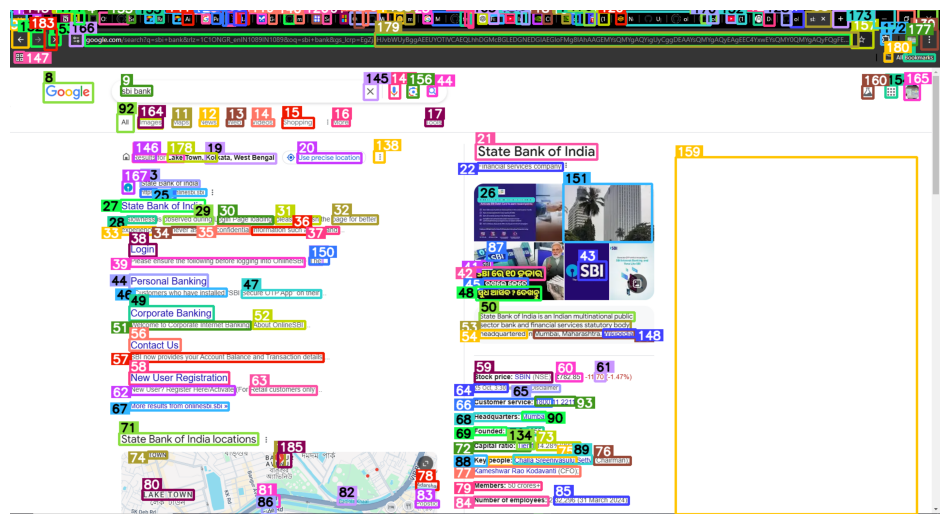

In [79]:
plt.figure(figsize=(12,12))

image = Image.open(io.BytesIO(base64.b64decode(dino_labled_img)))
plt.axis('off')

plt.imshow(image)

In [70]:
prompt = f"I want to go to the website of the corresponding bank that i am searching for which text box has the website of the bank based on the following data {text2}"
response = ollama.chat(model="llama3.2", messages=[{'role': 'user', 'content': prompt}])
print(response['message']['content'])

Based on the provided data, the website URL for State Bank of India is located in Text Box ID 25, which reads "onlinesbi sbi".


In [38]:
prompt = f"I want to navigate to the bank's website what is the site and which text box does it correspond to based on the following data {text}"

response = ollama.chat(model="llama3.2", messages=[{'role': 'user', 'content': prompt}])
print(response['message']['content'])

Based on the data you provided, it appears that the bank's website is State Bank of India's official website.

To navigate to the bank's website, you would need to enter the following URL into your web browser:

https://onlinesbi.com/

This corresponds to Text Box ID 25: onlinesbi sbi.

Please note that this URL may not be the only way to access the website, and the actual URL used by SBI Online Banking may vary.


##### Our first task - What is the wwather in Lodon today?

In [72]:
platform = 'pc'
cnt = 0
image_path = 'imgs\weather_try1.png'
if platform == 'pc':
    draw_bbox_config = {
        'text_scale': 0.8,
        'text_thickness': 2,
        'text_padding': 3,
        'thickness': 3,
    }
    BOX_TRESHOLD = 0.05
elif platform == 'web':
    draw_bbox_config = {
        'text_scale': 0.8,
        'text_thickness': 2,
        'text_padding': 3,
        'thickness': 3,
    }
    BOX_TRESHOLD = 0.05
elif platform == 'mobile':
    draw_bbox_config = {
        'text_scale': 0.8,
        'text_thickness': 2,
        'text_padding': 3,
        'thickness': 3,
    }
    BOX_TRESHOLD = 0.05
image = Image.open(image_path)
image_rgb = image.convert('RGB')

ocr_bbox_rslt, is_goal_filtered = check_ocr_box(image_path, display_img = False, output_bb_format='xyxy', goal_filtering=None, easyocr_args={'paragraph': False, 'text_threshold':0.9})
text, ocr_bbox = ocr_bbox_rslt

dino_labled_img, label_coordinates, parsed_content_list = get_som_labeled_img(image_path, som_model, BOX_TRESHOLD = BOX_TRESHOLD, output_coord_in_ratio=False, ocr_bbox=ocr_bbox,draw_bbox_config=draw_bbox_config, caption_model_processor=caption_model_processor, ocr_text=text,use_local_semantics=False)

<>:3: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\w'
C:\Users\user\AppData\Local\Temp\ipykernel_22092\862239219.py:3: SyntaxWarning: invalid escape sequence '\w'
  image_path = 'imgs\weather_try1.png'



image 1/1 c:\Users\user\Desktop\fellowship\OmniParser\imgs\weather_try1.png: 704x1280 300 icons, 374.4ms
Speed: 21.3ms preprocess, 374.4ms inference, 33.0ms postprocess per image at shape (1, 3, 704, 1280)


In [73]:
text3 = ", ".join(parsed_content_list)
text3

"Text Box ID 0: 0 /0, Text Box ID 1: X, Text Box ID 2: 0 | 0 w |, Text Box ID 3: M | O fe, Text Box ID 4: Fi|, Text Box ID 5: N | 0, Text Box ID 6: google com /search?q-what+istthe+weather+in+londongrlz- 1CIONGR_enIN1O89IN1089&oq-what+is+the+weather+in+london&gs_Icrp-EgZjaHJvbWUyCOgAEEUYORiABDIHCAEQABiABDIHCAIQABiABDIHCAMQABiABDIHCAQQABiABDIHCAUQ _, Text Box ID 7: 0 | = 0 ,, Text Box ID 8: Bookmarks, Text Box ID 9: Google, Text Box ID 10: what, Text Box ID 11: the weather in london, Text Box ID 12: News, Text Box ID 13: Images, Text Box ID 14: Videos, Text Box ID 15: Shopping, Text Box ID 16: Web, Text Box ID 17: Maps, Text Box ID 18: More, Text Box ID 19: Tools, Text Box ID 20: Results for London, UK, Text Box ID 21: Choose area, Text Box ID 22: Precipitation:, Text Box ID 23: Weather, Text Box ID 24: 14, Text Box ID 25: Humidity:, Text Box ID 26: Sunday; 5.00 pm, Text Box ID 27: Wind:, Text Box ID 28: Partly Cloudy, Text Box ID 29: Temperature, Text Box ID 30: Precipitation, Text Box

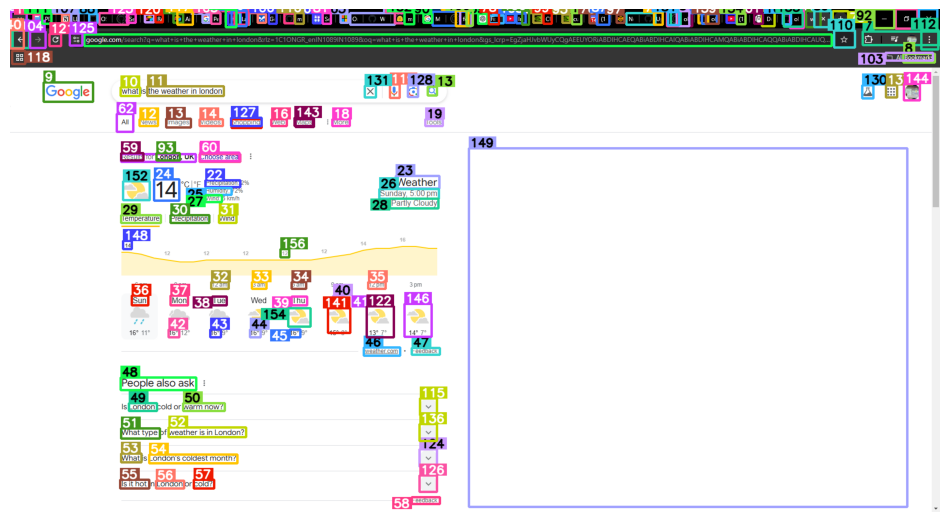

In [74]:
plt.figure(figsize=(12,12))

image = Image.open(io.BytesIO(base64.b64decode(dino_labled_img)))
plt.axis('off')

plt.imshow(image)

In [75]:
prompt = f'I want to get the weather in london which text boxes correspond to that data based on this {text3}'

response = ollama.chat(model="llama3.2", messages=[{'role': 'user', 'content': prompt}])
print(response['message']['content'])

Based on the provided text box IDs, the weather data for London is located in Text Box ID 25: Humidity:, which displays the humidity level.

However, to get a more comprehensive view of the current weather conditions and forecast, I would recommend checking the following additional text boxes:

- Text Box ID 24: Temperature (displays the temperature)
- Text Box ID 27: Wind (displays the wind speed or direction)
- Text Box ID 28: Precipitation (displays the precipitation level or type)
- Text Box ID 30: Precipitation (displays additional precipitation information)

Please note that these text boxes may not be directly related to weather, but they can provide additional context about the current conditions and forecast.


In [ ]:
!pip freeze > requirements.txt